# Este codigo se corrio desde google drive, si se planea correr desde una laptop, cambiar la funcion de lectura de datos

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/Shareddrives/Funados x el KIKE/Reto"
!ls

/content/gdrive/Shareddrives/Funados x el KIKE/Reto
'Comparación modelos .gdoc'		 NN_labels_clean.h5
'Comparación modelos.gsheet'		 NN_labels_tokenized.h5
'Comparación modelos matemáticos.gdoc'	 NN_nuevo_labels.h5
 labels_clean.csv			 nuevo_labels.csv
 labels_tokenized.csv			'Pinche diego y sus mamadas.ipynb'
 LSTM_labels_clean.h5			'Untitled0 (1).ipynb'
 LSTM_labels_tokenized.h5		 Untitled0.ipynb
 LSTM_nuevo_labels.h5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import keras

In [ ]:
def datos(data1, modelo1):
  data = pd.read_csv(data1)

  X = data[['sub1', 'sub2']]
  y = data['verdict']

  # Tokenizar y convertir los textos en secuencias numéricas
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(X['sub1'] + ' ' + X['sub2'])

  X_sequences = tokenizer.texts_to_sequences(X['sub1'] + ' ' + X['sub2'])

  # Rellenar las secuencias para que todas tengan la misma longitud
  max_len = max([len(seq) for seq in X_sequences])
  X_padded = pad_sequences(X_sequences, maxlen=max_len)

  # Dividir los datos en conjuntos de entrenamiento y prueba
  X_train, X_test, y_train, y_test = train_test_split(
      X_padded, y, test_size=0.15, random_state=42)
  
  modelo = keras.models.load_model(modelo1)

  # Evaluar el modelo en los datos de prueba
  y_pred = modelo.predict(X_test)
  y_pred = np.round(y_pred).flatten()

  confusion_mat = confusion_matrix(y_test, y_pred)
  confusion_mat_percentage = confusion_mat.astype(
      'float') / confusion_mat.sum(axis=1)[:, np.newaxis]

  print("Matriz de confusión (porcentaje):")
  print(confusion_mat_percentage)

  # Display the confusion matrix as a heatmap
  sns.heatmap(confusion_mat_percentage, annot=True, fmt=".2%", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

5/5 [==============================] - 7s 1s/step
Matriz de confusión (porcentaje):
[[0.87       0.13      ]
 [0.59459459 0.40540541]]


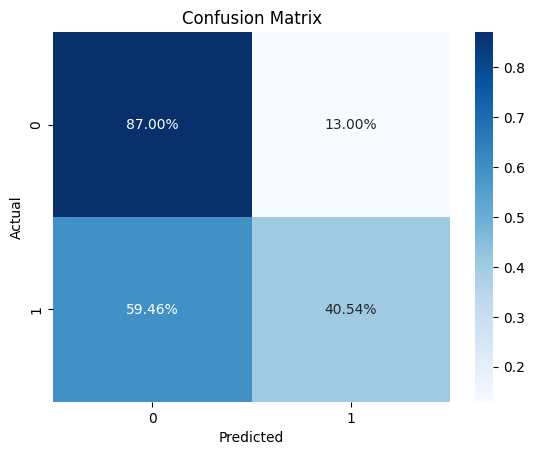

In [ ]:
datos("labels_clean.csv","LSTM_labels_clean.h5")

5/5 [==============================] - 0s 4ms/step
Matriz de confusión (porcentaje):
[[0.81       0.19      ]
 [0.59459459 0.40540541]]


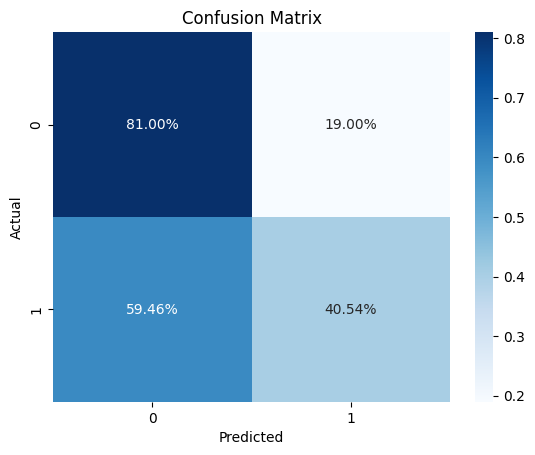

In [ ]:
datos("labels_clean.csv","NN_labels_clean.h5")

5/5 [==============================] - 8s 2s/step
Matriz de confusión (porcentaje):
[[0.75       0.25      ]
 [0.56756757 0.43243243]]


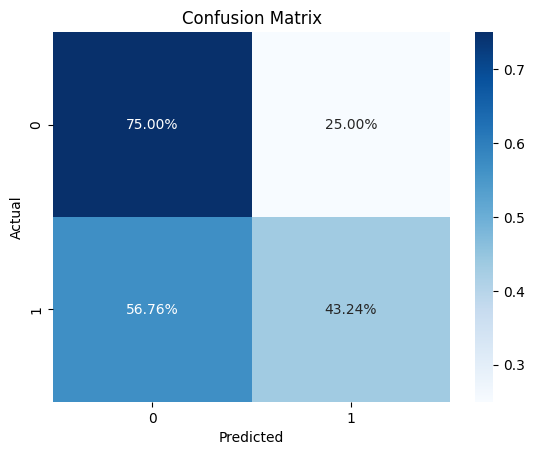

In [ ]:
datos("nuevo_labels.csv","LSTM_nuevo_labels.h5")

5/5 [==============================] - 6s 1s/step
Matriz de confusión (porcentaje):
[[0.75       0.25      ]
 [0.56756757 0.43243243]]


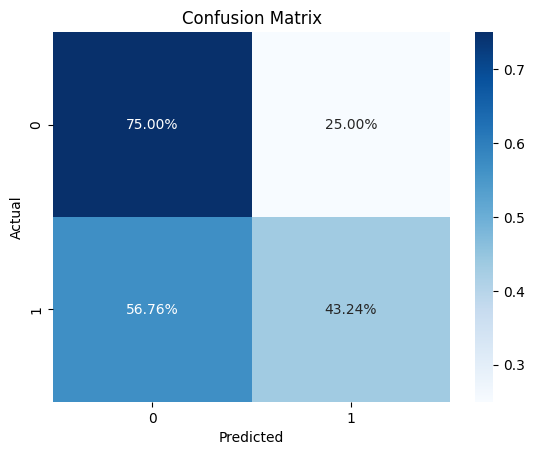

In [ ]:
datos("nuevo_labels.csv","LSTM_nuevo_labels.h5")

5/5 [==============================] - 7s 1s/step
Matriz de confusión (porcentaje):
[[1. 0.]
 [1. 0.]]


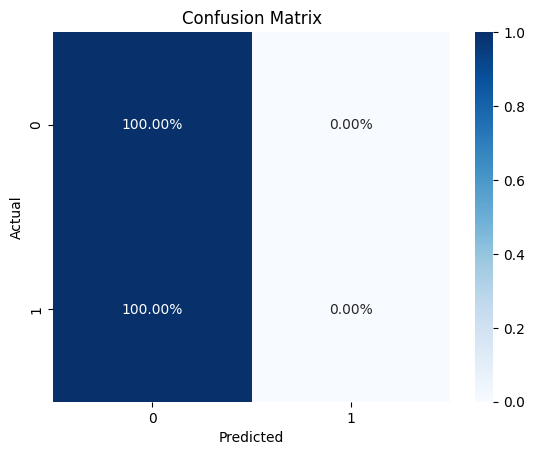

In [ ]:
datos("labels_tokenized.csv","LSTM_labels_tokenized.h5")

5/5 [==============================] - 0s 4ms/step
Matriz de confusión (porcentaje):
[[0.87       0.13      ]
 [0.51351351 0.48648649]]


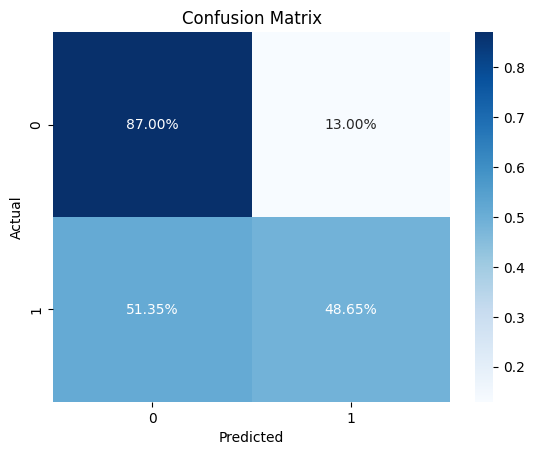

In [ ]:
datos("labels_tokenized.csv","NN_labels_tokenized.h5")